In [2]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline
import seaborn as sns; sns.set()
# fix random seed for reproducibility
numpy.random.seed(7)
import warnings
warnings.filterwarnings('ignore')

Using Theano backend.


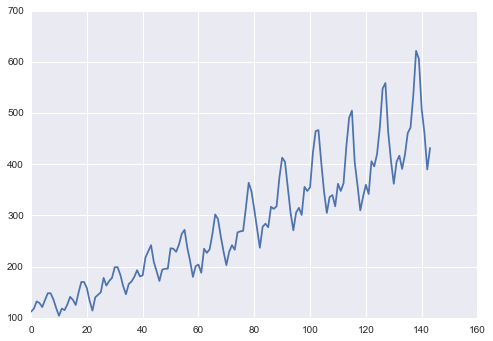

72 72


(72, 1)

In [3]:
# load the dataset
dataframe = pandas.read_csv('/Users/david/notebooks/data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
plt.plot(dataset)
plt.show()
# split into train and test sets
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# convert an array of values into a dataset matrix
train.shape

In [71]:
def trainmodel(look_back, show=False):
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    model = Sequential()
    model.add(Dense(20, input_dim=look_back, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=0)
    # Estimate model performance
    trainScore = model.evaluate(trainX, trainY, verbose=0)
    print('For ', look_back)
    print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(testX, testY, verbose=0)
    print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    # generate predictions for training
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
    
    error_train = dataset - trainPredictPlot
    error_test = dataset - testPredictPlot
    
    if show:
        # plot baseline and predictions
        plt.plot(dataset)
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
    
    return [trainScore, testScore, error_test]

In [22]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t and Y=t+1

For  1
Train Score: 358.28 MSE (18.93 RMSE)
Test Score: 1910.75 MSE (43.71 RMSE)
For  5
Train Score: 377.35 MSE (19.43 RMSE)
Test Score: 1976.46 MSE (44.46 RMSE)
For  10
Train Score: 441.51 MSE (21.01 RMSE)
Test Score: 1955.66 MSE (44.22 RMSE)
For  20
Train Score: 156.02 MSE (12.49 RMSE)
Test Score: 530.44 MSE (23.03 RMSE)
For  30
Train Score: 122.19 MSE (11.05 RMSE)
Test Score: 447.36 MSE (21.15 RMSE)
For  40
Train Score: 343.75 MSE (18.54 RMSE)
Test Score: 1145.78 MSE (33.85 RMSE)


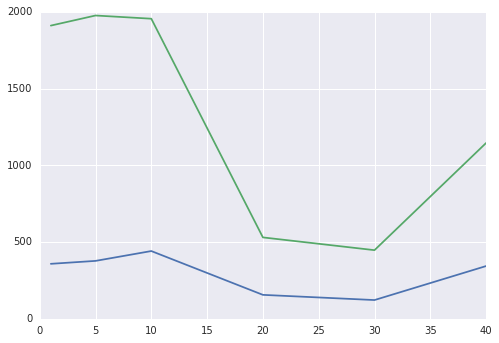

In [72]:
ar = [1,5, 10, 20, 30, 40]
train_errors = []
test_errors = []
test_error_ts = []
for i in ar:
    re, ee, ts = trainmodel(i)
    train_errors.append(re)
    test_errors.append(ee)
    test_error_ts.append(ts)

plt.plot(ar, train_errors)
plt.plot(ar, test_errors)
#print(train_errors)
# create and fit Multilayer Perceptron model

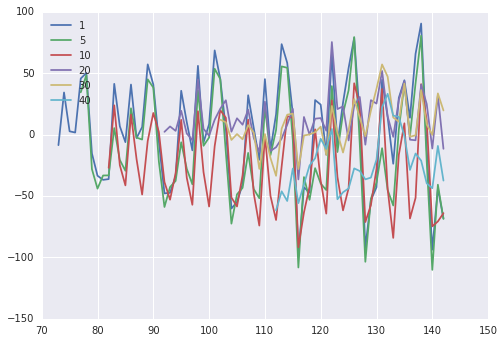

In [73]:
for i, j in zip(test_error_ts, ar):
    plt.plot(i, label = j)
plt.legend(loc='upper left')
plt.show()

For  20
Train Score: 87.46 MSE (9.35 RMSE)
Test Score: 289.87 MSE (17.03 RMSE)


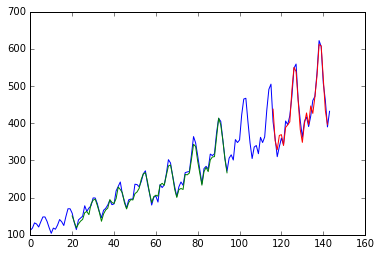

[87.462364095052081, 289.86935424804688]

In [56]:
trainmodel(20, True)

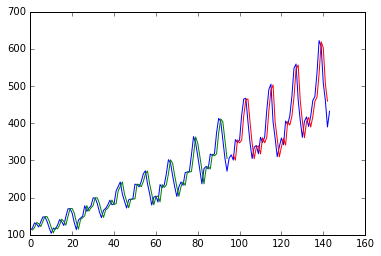

In [9]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()